In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA
from mpl_toolkits.mplot3d import axes3d

In [3]:
df=pd.read_excel("USA.xlsx")#Leemos el fichero xlsx

In [4]:
df#Mostramos el fichero del enunciado

,Ciudad,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
0,Phoenix,10.0,70.3,213.0,582.0,6.0,7.05,36.0
1,Little Rock,13.0,61.0,91.0,132.0,8.2,48.52,100.0
2,San Francisco,12.0,56.7,453.0,716.0,8.7,20.66,67.0
3,Denver,17.0,51.9,454.0,515.0,9.0,12.95,86.0
4,Hartford,56.0,49.1,412.0,158.0,9.0,43.37,127.0
5,Wilmington,36.0,54.0,80.0,80.0,9.0,40.25,114.0
6,Washington,29.0,57.3,434.0,757.0,9.3,38.89,111.0
7,Jacksonville,14.0,68.4,136.0,529.0,8.8,54.47,116.0
8,Miami,10.0,75.5,207.0,335.0,9.0,59.80,128.0
9,Atlanta,24.0,61.5,368.0,497.0,9.1,48.34,115.0


# Ejercicio 1

In [5]:
ciudades=df.iloc[:,1:8] #Escogemos solo las columnas con valores numericos
df1 = ciudades.replace(np.nan, 0, regex=True) # Remplazamos los valores nan por 0
estd = StandardScaler().fit_transform(df1) #Estandarizamos los datos con la fncion StandarScaler

# Ejercicio 2 

In [6]:
mean_vec = np.mean(estd, axis=0) #Sacamos la media
cov_mat = (estd - mean_vec).T.dot((estd - mean_vec)) / (estd.shape[0]-1) #Calculamos la matriz de covarianza
print('Matriz covarianza \n%s' %cov_mat) #Mostramos la matriz de covarianza

Matriz covarianza 
[[ 1.025      -0.4444402   0.66088794  0.50612407  0.09705772  0.0556517
   0.37880272]
 [-0.4444402   1.025      -0.19479322 -0.06424509 -0.35848312  0.39590975
  -0.44099817]
 [ 0.66088794 -0.19479322  1.025       0.97915108  0.24389551 -0.0332273
   0.13512503]
 [ 0.50612407 -0.06424509  0.97915108  1.025       0.21795984 -0.0267717
   0.04313527]
 [ 0.09705772 -0.35848312  0.24389551  0.21795984  1.025      -0.01331924
   0.16820823]
 [ 0.0556517   0.39590975 -0.0332273  -0.0267717  -0.01331924  1.025
   0.50849912]
 [ 0.37880272 -0.44099817  0.13512503  0.04313527  0.16820823  0.50849912
   1.025     ]]


In [7]:
cov_mat = np.cov(estd.T) #Otra forma de sacar la matriz de covarianza
eig_vals, eig_vecs = np.linalg.eig(cov_mat) #Calculamos autovectores y autovalores. Los motramos a continuacion
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 4.89698817e-01 -1.49529278e-01  1.83345726e-01 -7.30394180e-01
  -4.04210075e-01  8.45756306e-02 -1.43501956e-02]
 [-3.15370690e-01  2.36641125e-02  6.10661071e-01 -1.62465152e-01
   1.85227939e-01 -8.86378850e-02 -6.77136178e-01]
 [ 5.41168703e-01  7.45180920e-01 -4.27335187e-02  1.64101110e-01
   2.62723671e-02 -2.25881089e-01 -2.67159129e-01]
 [ 4.87588112e-01 -6.49125507e-01 -8.78632695e-02  3.49104824e-01
   1.13403769e-01 -2.82003804e-01 -3.44837959e-01]
 [ 2.49874928e-01 -1.57653766e-02  1.50053780e-01 -2.68254900e-01
   8.61901314e-01  5.54714865e-02  3.11265456e-01]
 [ 1.87312186e-04  1.03153086e-02 -5.53573845e-01 -1.60598783e-01
   1.83937185e-01  6.25879366e-01 -4.92036299e-01]
 [ 2.60179073e-01 -8.21739320e-03  5.04946685e-01  4.39969776e-01
  -1.09760698e-01  6.77967410e-01  1.09578949e-01]]

Eigenvalues 
[2.79632268 0.0261528  0.10279478 0.35544813 0.91429107 1.55014323
 1.42984731]


In [8]:
#Eliminamos ducplicados y los mostramos en orden descendente
porcentajecov=[]
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.796322676234295
0.026152798357252025
0.10279478420286702
0.3554481308521866
0.9142910708608596
1.5501432256880212
1.4298473138045202


In [9]:
porcentajecov=[] #Matriz vacia en la que guardamos los porcentajes
sumatorio=eig_vals.sum() #Almacenamos el sumatorio de los autovalores
print(sumatorio)
for i in eig_pairs:#Bucle para sacar los porcentajes de varianza
    porcentcov=(i[0]*100)/sumatorio
    porcentajecov.append(porcentcov)#Se añadiran los valores obtenidos a la matriz
dataframe=pd.DataFrame(eig_vals,index=['1', '2', '3', '4', '5', '6','7'],columns=['Autovalores']) #definimos un df de autovalores
dataframe['% Varianza']= porcentajecov #Añadimos la columna de porcentaje
dataframe['% Varianza Acu']= dataframe['% Varianza'].cumsum() #Añadimos la columna de porcentaje acumulado
dataframe

7.1750000000000025


,Autovalores,% Varianza,% Varianza Acu
1,2.796323,38.973138,38.973138
2,0.026153,0.364499,39.337637
3,0.102795,1.432680,40.770317
4,0.355448,4.953981,45.724298
5,0.914291,12.742733,58.467031
6,1.550143,21.604784,80.071814
7,1.429847,19.928186,100.000000


In [10]:
dataframe1=pd.DataFrame(eig_vecs,index=['SO2','Neg.Temp','Empresas','Poblacion','Viento','Precip','Dias'],columns=['Componente 1','Componente 2','Componente 3','Componente 4','Componente 5','Componente 6','Componente 7']) #definimos un df de autovalores
dataframe1
#Sobre este habria que realizar un estudio, y juntarlo por componentes: Componente 1: Ciudades con muchas empresas y poblacion
# Y bajo SO2

,Componente 1,Componente 2,Componente 3,Componente 4,Componente 5,Componente 6,Componente 7
SO2,0.489699,-0.149529,0.183346,-0.730394,-0.404210,0.084576,-0.014350
Neg.Temp,-0.315371,0.023664,0.610661,-0.162465,0.185228,-0.088638,-0.677136
Empresas,0.541169,0.745181,-0.042734,0.164101,0.026272,-0.225881,-0.267159
Poblacion,0.487588,-0.649126,-0.087863,0.349105,0.113404,-0.282004,-0.344838
Viento,0.249875,-0.015765,0.150054,-0.268255,0.861901,0.055471,0.311265
Precip,0.000187,0.010315,-0.553574,-0.160599,0.183937,0.625879,-0.492036
Dias,0.260179,-0.008217,0.504947,0.439970,-0.109761,0.677967,0.109579


In [11]:
#Cuanta informacion perdemos con 2 componentes
InfoPer2= 100-dataframe.iloc[1,2]
print("Se pierde el",InfoPer2,"%")

Se pierde el 60.66236272346277 %


In [12]:
#Cuanta informacion representamos con 3 componentes
InfoRepre3= dataframe.iloc[2,2]
print("Se representa el",InfoRepre3,"%")

Se representa el 40.77031719574095 %


# Ejercicio 3

,Componente 1,Componente 2,Componente 3,Ciudad
35,182.915972,-15.848277,52.806975,Salt Lake City
22,148.654620,-124.945772,39.619090,Alburquerque
13,213.289428,-87.075600,32.733390,Wichita
29,495.910235,-87.878630,37.031200,Pittsburgh


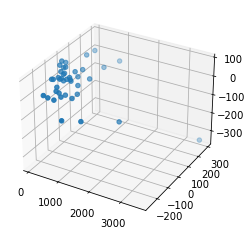

In [55]:
#Grafico 3D de los componentes 
#Cogemos los componentes que queramos analizar, seleccionando las columnas en dataframe11. Se cogeran las correctas despues de
#hacer el estudio
dataframe11=dataframe1.iloc[:,0:3]
diagrama=ciudades.dot(dataframe11)
diagrama["Ciudad"]=df["Ciudad"]
#Definimos los ejes del grafico 3D
x=diagrama["Componente 1"]
y=diagrama["Componente 2"]
z=diagrama["Componente 3"]
# Creamos el plano 3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#Finalmente usamos la funcion scatter3D, para sacar el grafico segun los ejes definidos
ax.scatter3D(x,y,z)
#Funcion que escoge filas aleatorias del dataframe
diagrama.sample(4)

# Ejercicio 4

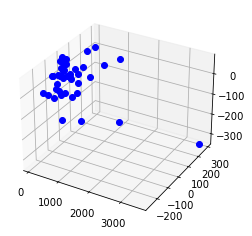

In [64]:
#Pasamos a realizar lo mismo realizado en el aparatdo anterior pero con sklearn
#Aun por hacer
x=diagrama["Componente 1"]
y=diagrama["Componente 2"]
z=diagrama["Componente 3"]
fig2=plt.figure()
ax2  = fig2.add_subplot(111, projection='3d')
ax2.plot3D(x,y,z,'ob')
plt.show()